In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [110]:
def readImg_Gray(path):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(300,300))
    return img

def drawImg(img,title='Image'):
    plt.axis('off')
    plt.title(title+str(img.shape))
    plt.imshow(img,cmap='gray')
    plt.show()

def extractFeature(img,kernel):
    W = img.shape[0] - len(kernel) + 1
    H= img.shape[1] - len(kernel) + 1    
    newImg=np.zeros((W,H))

    for row in range(W):
        for col in range(H):
            for i in range(len(kernel)):
                for j in range(len(kernel)):
                    newImg[row][col]+=kernel[i][j]*img[row+i][col+j]
            if newImg[row][col]>255:
                newImg[row][col]=255
            elif newImg[row][col]<0:
                newImg[row][col]=0
    drawImg(newImg)

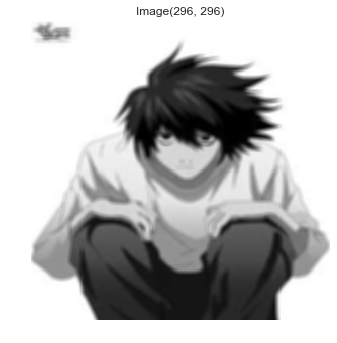

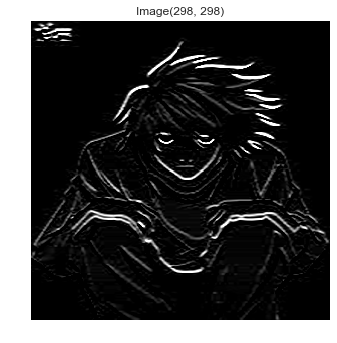

In [108]:
blur_kernel=[[0.01,0.01,0.01,0.01,0.01],
             [0.01,0.01,0.01,0.01,0.01],
             [0.01,0.01,0.01,0.01,0.01],
             [0.01,0.01,0.01,0.01,0.01],
             [0.01,0.01,0.01,0.01,0.01]]  # 5 x 5 filter

edge_kernel=[[1,1,1],
             [0,0,0],
             [-1,-1,-1]]  # 3 x 3 filter

img=readImg_Gray('Images/L.jpeg')

extractFeature(img,blur_kernel)
extractFeature(img,edge_kernel)